# Assignment 2 
# CS 686

# Kamran Karim
# 20594936


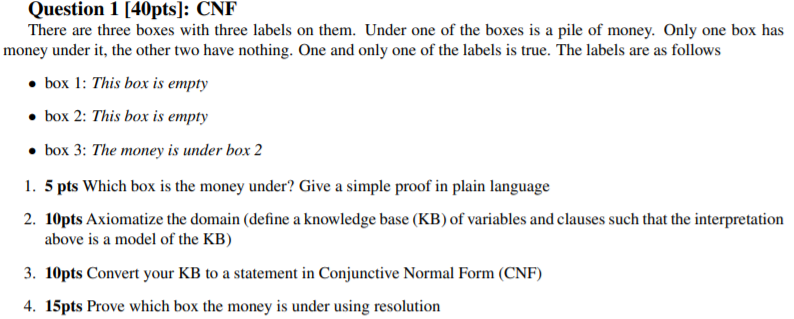

In [1]:
from IPython.display import Image


#%pwd
#%cd '/org/cs/u1/k3karim/cs686/Assign 2'
fig = Image(filename=("Q1.PNG"))
fig

# part a
Money is under box 1.
Since, if the money was in box 2, then, box 3 must be telling the truth, but box 1 will also true as box 3 states money to be under box 2 and box 1 says the it doesn't have the money. Now if box 3 would have the money, then both, box 1 and box 2 will have true labels, and we cannot have that either. While if box 1 had the money, then box 1 will be lying, as is box 3, only box 2 will be true. All of this assumes that we already took care of the constraint that only one box has the money

# part b
Knowledge base:
prop 1: exactly one box has money in it 
prop 2: exactly one label on the boxes is true

Let "$b_i$" represent the situation where money is in box i, and "$!b_i$" represent the situation where money is not in box i.

Then, prop 1 = $(b_1 \land !b_2\land !b_3) \lor (!b_1 \land b_2\land !b_3) \lor (!b_1 \land !b_2\land b_3) $ 

And, prop 2 = $(b_1 \land !b_2\land !b_2) \lor (!b_1 \land b_2\land !b_2) \lor (b_1 \land b_2\land b_2) $ 



# part c
Note that part of this question is covered, when we used the knowledge base to construct the prop 1 and prop 2. 
The conjunctive normal form of the above axiomatised knowledge base is simply:
prop 1 and prop 2, that is.

$[(b_1 \land !b_2\land !b_3) \lor (!b_1 \land b_2\land !b_3) \lor (!b_1 \land !b_2\land b_3)] \land [(b_1 \land !b_2\land !b_2) \lor (!b_1 \land b_2\land !b_2) \lor (b_1 \land b_2\land b_2)] $ 

Now, from here we can use the distributive law, again and again to get all possible combinations of the above in terms of "OR" statements, which will ultimately reach into CNF. That is CNF = $p_1 \land p_2 \land....\land p_n $ One e.g. of such $p_i$ is:

$(b_1 \lor !b_1\lor!b_2 \lor b1 \lor !b1 \lor b_2) \land ..... $

Note that many such combinations exist in the CNF of these propositions and it was found to be redundant to find such combinations. Some other combinations ($p_is$)found which were then reduced to 

$(b_1\lor b_2 \lor b_3 \lor !b_1 \lor !b2)$

$(b_1 \lor  b_2 \lor !b_2)$

$(b_1\lor !b_1)$ etc. 

The CNF, consists of the intersection of these equations and many others. It seemed easier to solve the equation in the form that is given in the beginning of this solution.

# part d

Using the form that we had specified in the part c of the solution, and from the knowledge in part a, that the money must be in box 1, we show this by resolution.

$[(b_1 \land !b_2\land !b_3) \lor (!b_1 \land b_2\land !b_3) \lor (!b_1 \land !b_2\land b_3)] \land [(b_1 \land !b_2\land !b_2) \lor (!b_1 \land b_2\land !b_2) \lor (b_1 \land b_2\land b_2)] \land !b_1$ 

Since $b_1$ is not true, we are left with the following:

$[(!b_1 \land b_2\land !b_3) \lor (!b_1 \land !b_2\land b_3)] \land [(!b_1 \land b_2\land !b_2) ] \land !b_1$.

But note that, $b2\land !b2 = \emptyset \implies  [(!b_1 \land b_2\land !b_2) ] =\emptyset $ and hence, the CNF results in a contradiction. So we can conclude that $!b_1$ is untrue and hence the money must be in box 1. 

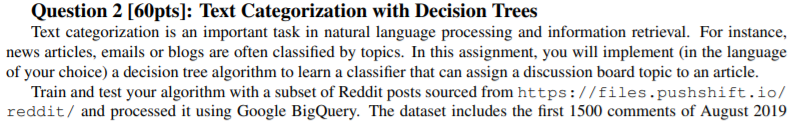

In [7]:
fig1 = Image(filename=("Q2_1.PNG"))
fig1

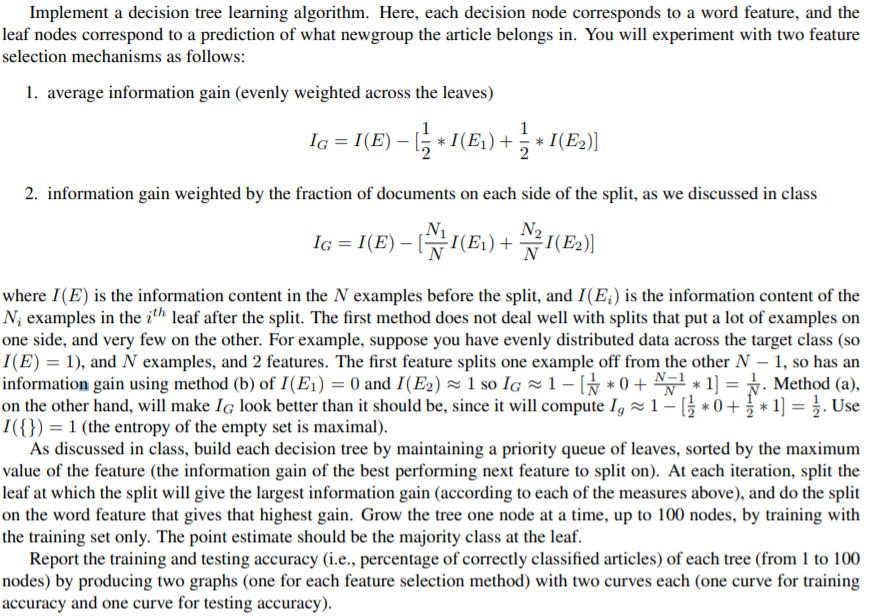

In [8]:
fig = Image(filename=("Q2_2.PNG"))
fig

# Code

In [9]:
def Info(col):
    info = 0
    elements,counts = np.unique(col,return_counts = True)
    tot= sum(counts)
    for i in range(len(elements)):
        info += (-counts[i]/tot)*m.log(counts[i]/tot,2)
    return info


#%%


def InfoGain1(data, split_att, target_name="class"):
   
    #Calculate the entropy of the total dataset
    tot_info = Info(data[[target_name]])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_att],return_counts=True)
    tot = len(data[[split_att]])
    #Calculate the weighted entropy
    Weighted_info = 0
    for i in range(len(vals)):
        ps = [j for j,x in enumerate(data[split_att]) if x == vals[i]]
        mat = data.iloc[ps]
        colz = mat[["target"]]
        inf3 = Info(colz)
        Weighted_info += (1/2)*inf3
    
    #Calculate the information gain
    Information_Gain = tot_info - Weighted_info
    return Information_Gain
#%%

def InfoGain2(data, split_att, target_name="class"):
   
    #Calculate the entropy of the total dataset
    tot_info = Info(data[[target_name]])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_att],return_counts=True)
    tot = len(data[split_att])
    #Calculate the weighted entropy
    Weighted_info = 0
    for i in range(len(vals)):
        inf1 = (counts[i]/tot)
        ps = [j for j,x in enumerate(data[split_att]) if x == vals[i]]
        mat = data.iloc[ps]
        colz = mat[["target"]]
        inf3 = Info(colz)
        Weighted_info += inf1*inf3
    #Calculate the information gain
    Information_Gain = tot_info - Weighted_info
    return Information_Gain
    

    
    
def tree_proc(data, IG):
    DT = {}#    pointEstimate(Y , E) = initial decision tree
    PQ = dict()
    nodes = 0
    p = [i for i,x in enumerate(data['target'])]
    parent_ind = (p)
    branch = list()
    while nodes <= 100:
        features = data.columns[:-1]
        for p in parent_ind:
            for f in features:
                ig = IG(data.iloc[p,], f, "target")
                zero = [i for i,x in enumerate(data['f']) if x == 0]
                one =  [i for i,x in enumerate(data['f']) if x == 1]            
                zero_ind = [value for value in zero if value in parent_ind] 
                one_ind = [value for value in one if value in parent_ind] 
                
                PQ[((branch + f), (zero_ind, one_ind))] = IG(data,f,"target")
        PQ = {k: v for k, v in sorted(PQ.items(), key=lambda item: item[1], reverse = True)}
        t = next(iter(PQ))
        PQ.pop(t, None)
        DT.append(t) #OR use a dictionary tree[best_feature][value] = subtree
        nodes +=1
        parent_ind = t[1]
        branch = t[0]
    return(tree)


def pred(quer,tree):
    for i in list(quer.keys()):
        if i in list(tree.keys()):
            result = tree[i][quer[i]]
            if isinstance(result,dict):
                return pred(quer,result)
            else:
                return result

        
def test(data,tree):
    quer = data.iloc[:,:-1].to_dict(orient = "records")
    
    predicted = pd.DataFrame(columns=["predicted"]) 
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = pred(queries[i],tree) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["class"])/len(data))*100,'%')
    


Note: that there are some bugs in the program, that I was not able to debug. The code had been working, and I got some outputs, I took pictures and used them to construct the decision tree. Unfortunately the program crashed once it was being runned, and I could not get it running agian. I wasnt able to test the pred and test function. Hence, unable to answer the question about accuracy of the program. or the graphs. But from the trees formed, it seems that the weighted method produces more accurate estimates, and hence, will have its curve above the average weighted method. As the number of nodes will increase, both methods will have more accuracy, and the difference between the two curves will tend to decrease with increasing nodes.
Note: help was taken from https://www.python-course.eu/Decision_Trees.php


# Decision trees

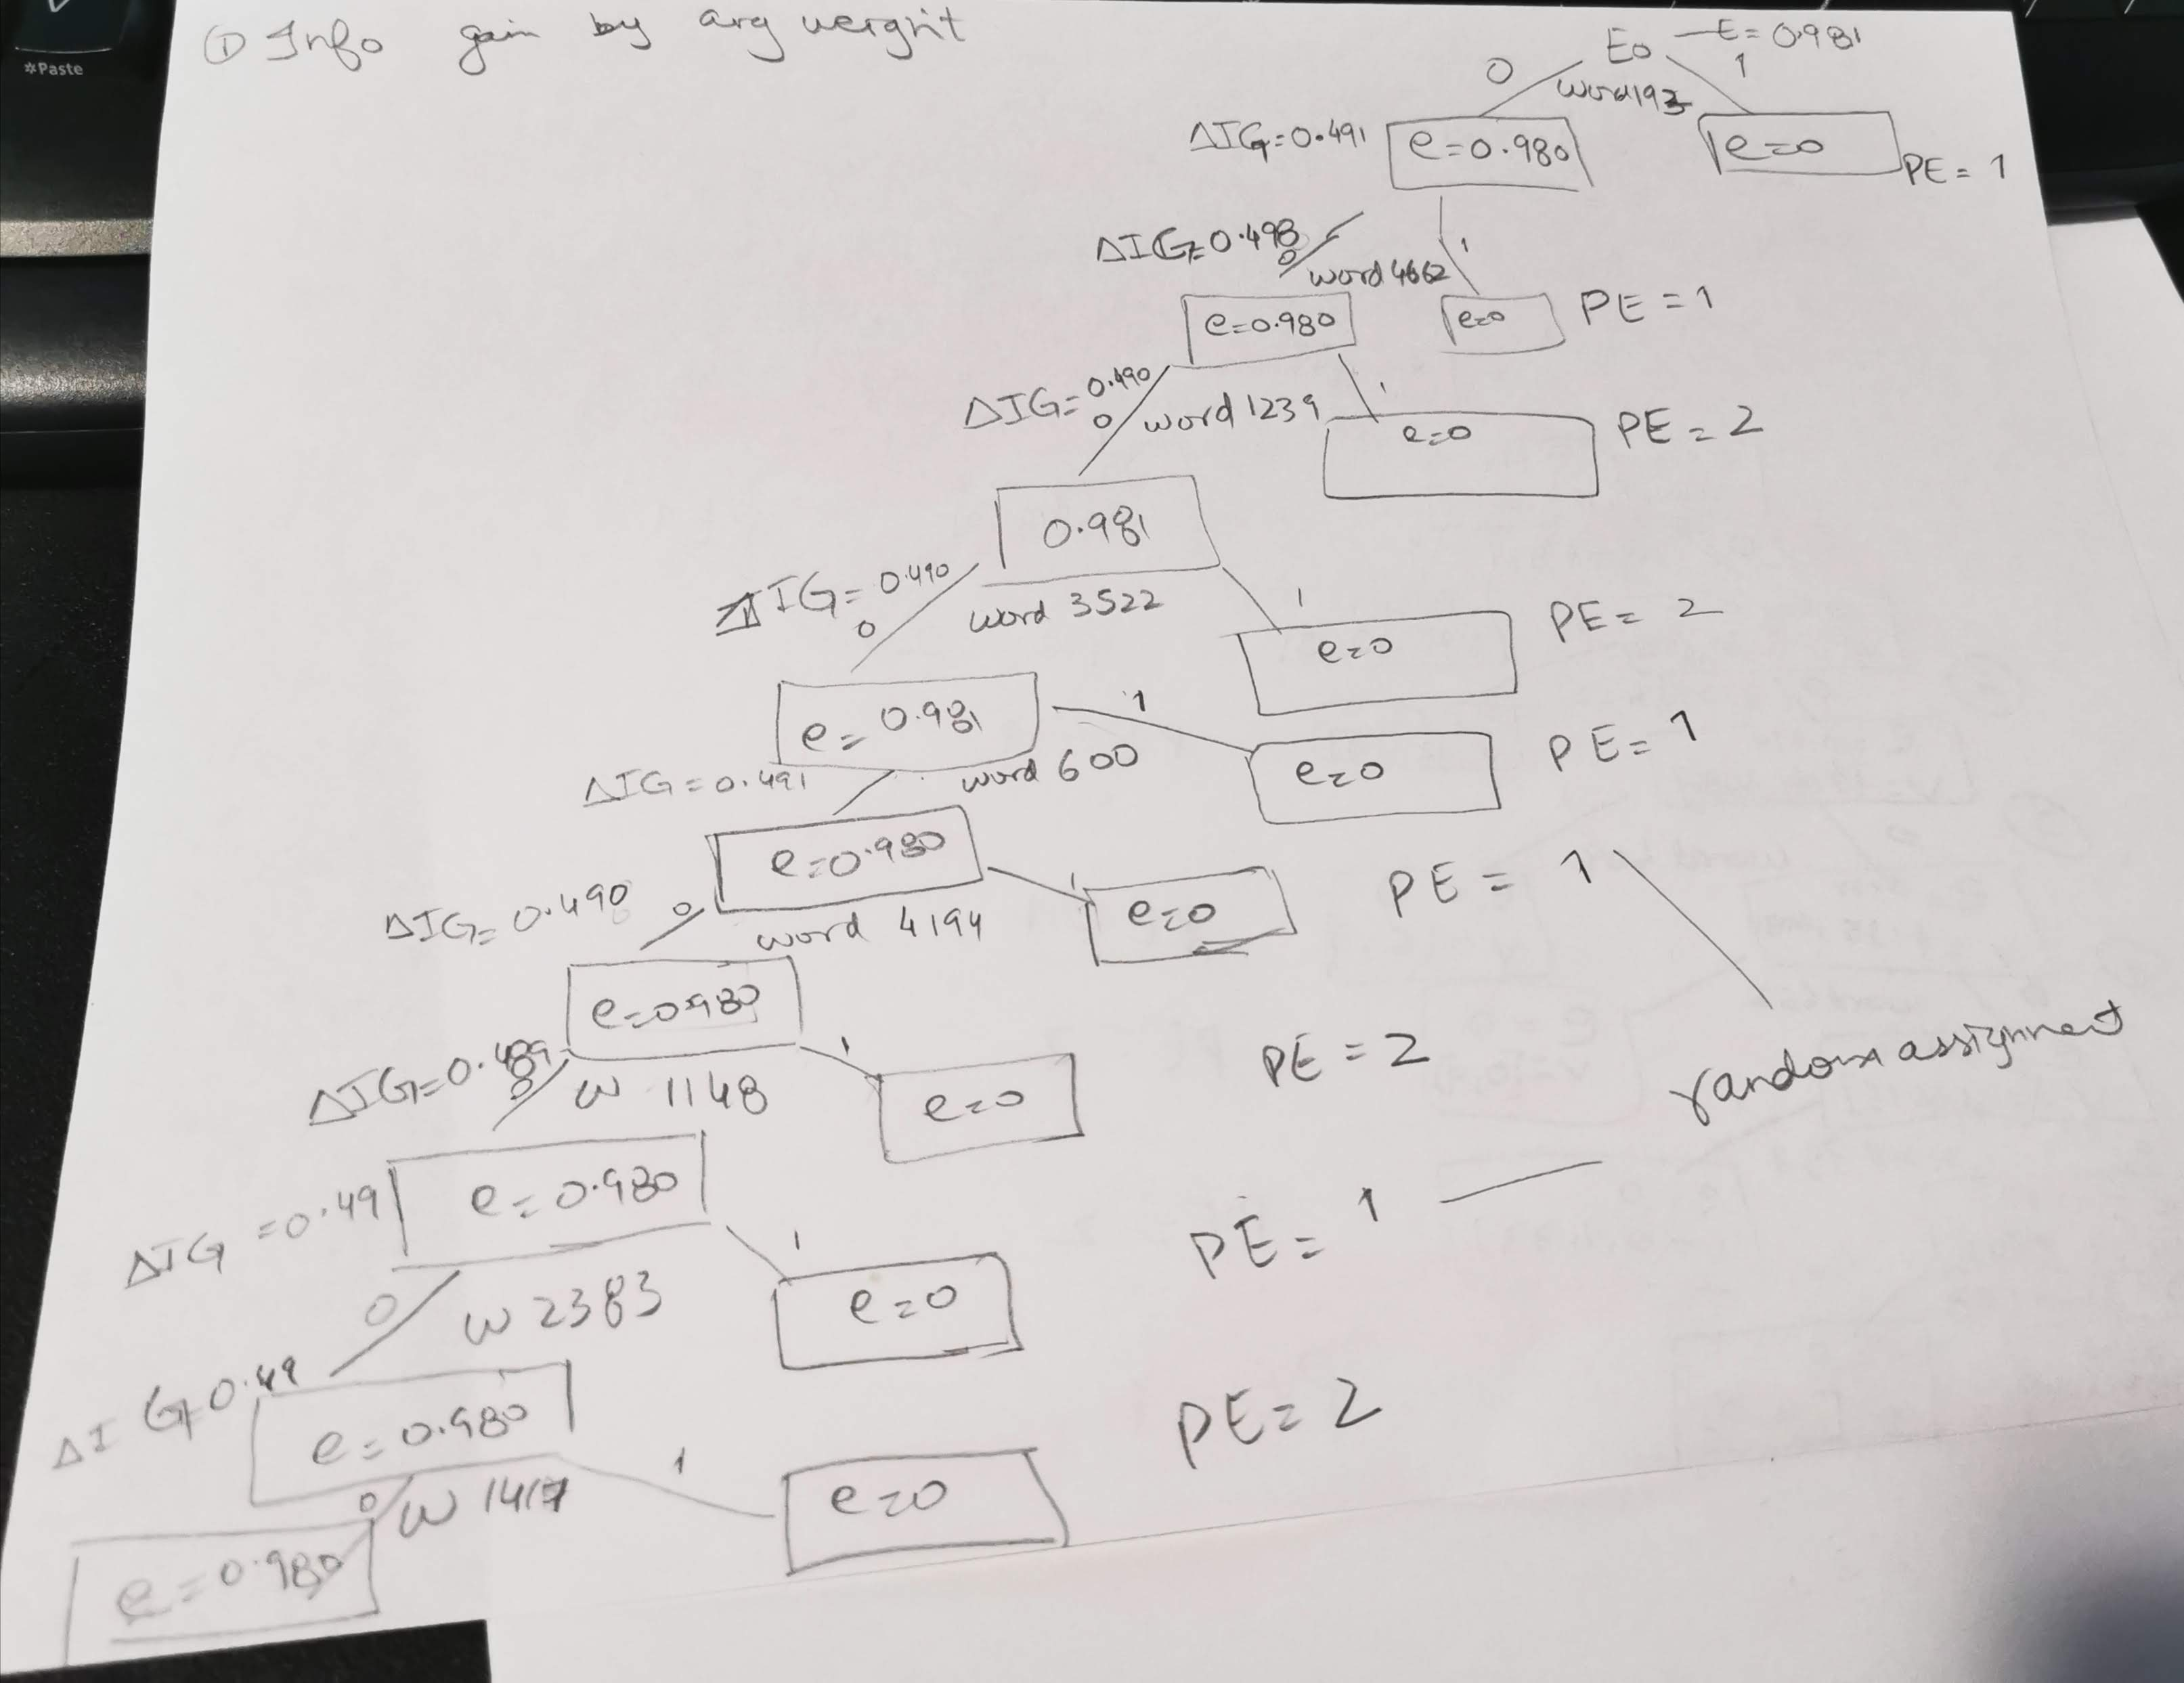

In [10]:
fig = Image(filename=("DT1.jpg"))
fig

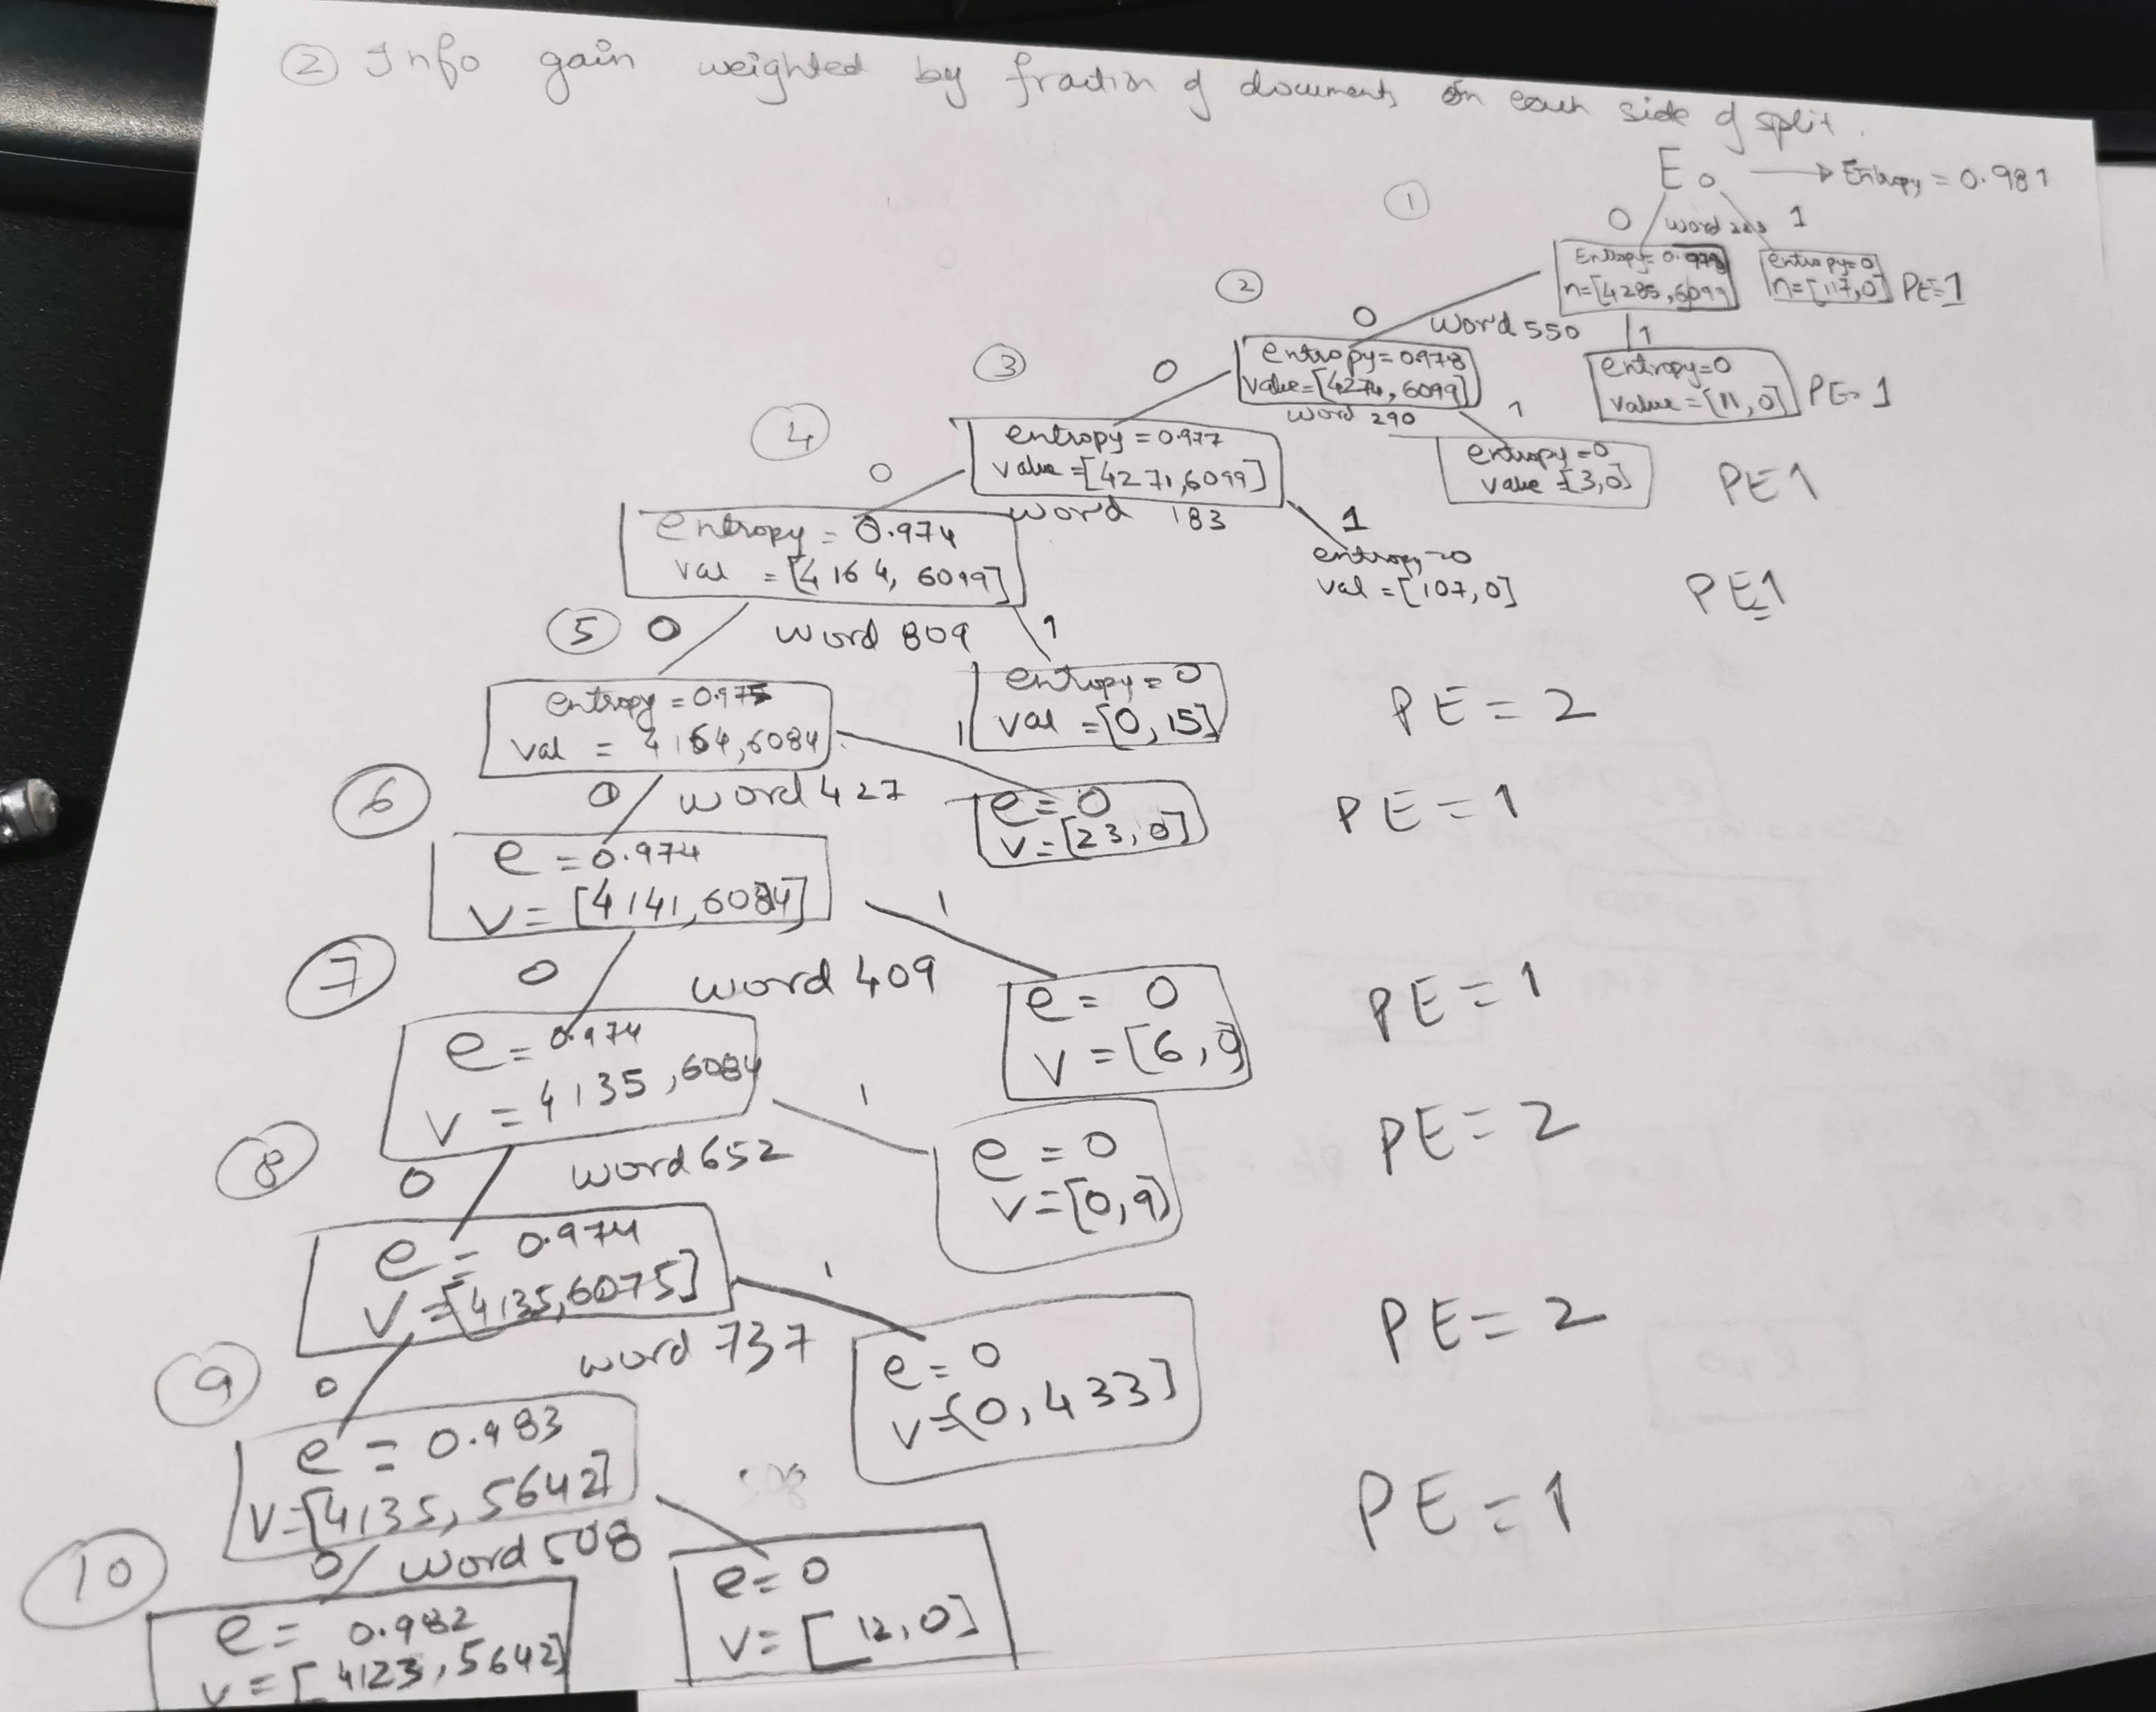

In [11]:
fig = Image(filename=("DT2.jpg"))
fig

Note that in the above, PE = point estimate, delta IG = information gain.